## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## EDA

In [5]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

In [6]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [7]:
df_train.tail()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0
58644,58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,5,0


In [8]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [10]:
df_train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

## Data does not contain null values

In [11]:
df_train=df_train.drop('id',axis=1)

## Data Visualization

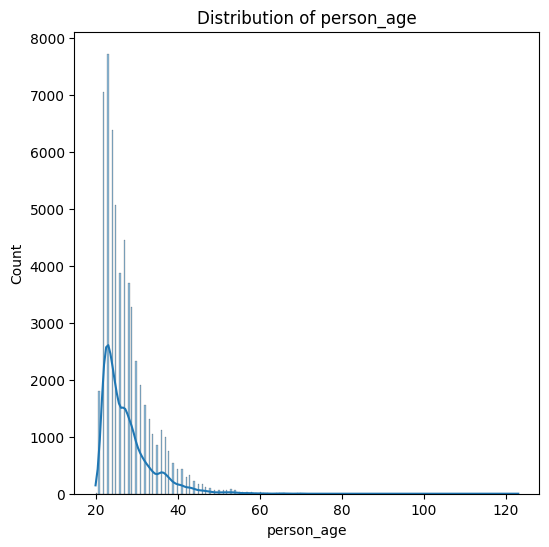

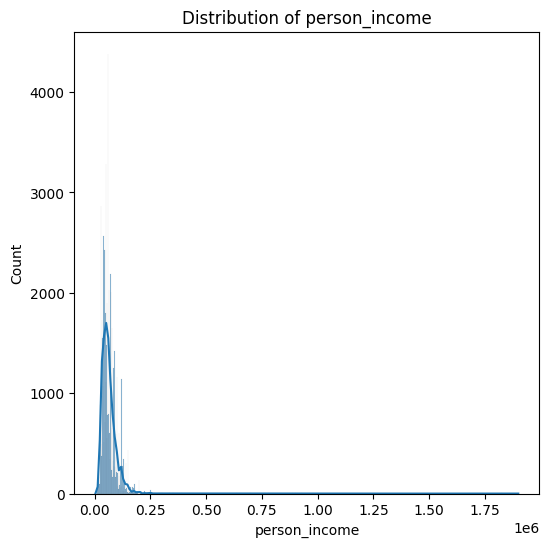

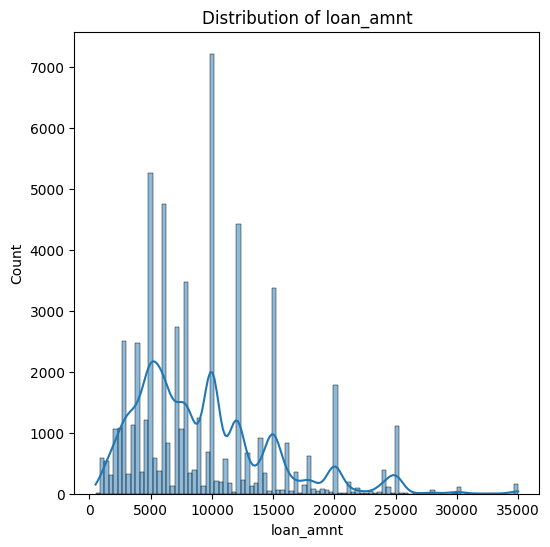

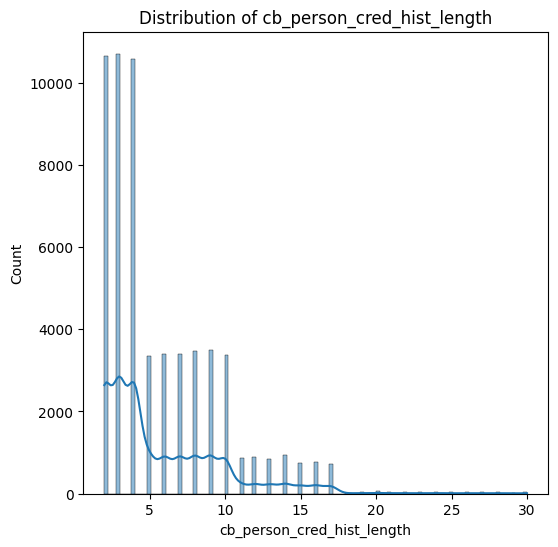

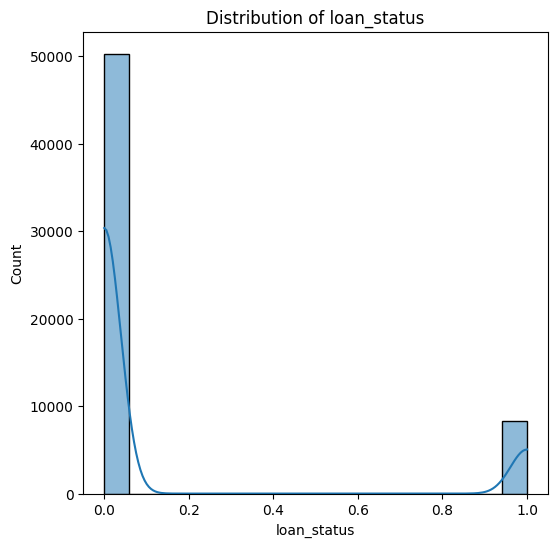

In [12]:
for cols in df_train.select_dtypes(include='int64').columns:
    plt.figure(figsize=(6,6))
    sns.histplot(data=df_train, x=cols, kde=True)  # Use sns.histplot and add kde=True for a KDE curve
    plt.title(f"Distribution of {cols}")
    plt.show()

In [13]:
df_train.select_dtypes('object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N
...,...,...,...,...
58640,MORTGAGE,EDUCATION,D,Y
58641,RENT,MEDICAL,C,N
58642,RENT,EDUCATION,D,N
58643,RENT,EDUCATION,A,N


## Model Training

In [14]:
X=df_train.drop('loan_status',axis=1)
y=df_train['loan_status']

In [15]:
le=LabelEncoder()
for col in X.select_dtypes('object').columns:
    X[col]=le.fit_transform(X[col])

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
models = {
    'Linear_Regression':LinearRegression(),
    'DecisionTree':DecisionTreeRegressor(),
    'Random Forest': RandomForestClassifier(),
    'XGB':XGBRegressor(),
    'SVM':SVC(),
    'LightBGM':LGBMClassifier()
}

In [18]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


for i in models:
    obj = models[i]
    obj.fit(X_train, y_train)
    obj_pred = obj.predict(X_test)

 
    accuracy = accuracy_score(y_test, obj_pred>0.5)
    precision = precision_score(y_test, obj_pred>0.5,average='weighted')
    recall = recall_score(y_test, obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test, obj_pred>0.5,average='weighted')

  
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)


results_df = pd.DataFrame(results)

print(results_df)

[LightGBM] [Info] Number of positive: 5882, number of negative: 35169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 41051, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143285 -> initscore=-1.788268
[LightGBM] [Info] Start training from score -1.788268
               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.889451   0.881395  0.889451  0.865418
1       DecisionTree  0.911674   0.914351  0.911674  0.912881
2      Random Forest  0.949642   0.948601  0.949642  0.946682
3                XGB  0.952711   0.951755  0.952711  0.950200
4                SVM  0.859725   0.739127  0.859725  0.794878
5           LightBGM  0.953336   0.952293  0.953336  0.951009


In [19]:
model =LGBMClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Classification Report :" , classification_report(y_pred,y_test))

[LightGBM] [Info] Number of positive: 5882, number of negative: 35169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 836
[LightGBM] [Info] Number of data points in the train set: 41051, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143285 -> initscore=-1.788268
[LightGBM] [Info] Start training from score -1.788268
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.96      0.97     15641
           1       0.73      0.92      0.81      1953

    accuracy                           0.95     17594
   macro avg       0.86      0.94      0.89     17594
weighted avg       0.96      0.95      0.96     17594



## Testing the Model

In [20]:
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [22]:
df_test.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [23]:
for col in df_test.select_dtypes('object').columns:
    df_test[col]=le.fit_transform(df_test[col])

In [24]:
X_test=df_test.drop("id",axis=1)

In [25]:
test_predictions = model.predict(X_test)
test_pred_probs = model.predict_proba(X_test)[:, 1]

In [26]:
print(test_pred_probs)

[0.98400467 0.01272402 0.49919165 ... 0.00743795 0.29468189 0.94294395]


## Making Submission

In [27]:
submission=pd.read_csv(r'/kaggle/input/playground-series-s4e10/sample_submission.csv')
submission.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [28]:
submission['loan_status'] = test_pred_probs

In [29]:
submission.to_csv('submission.csv', index=False)

In [30]:
submission

,id,loan_status
0,58645,0.984005
1,58646,0.012724
2,58647,0.499192
3,58648,0.014839
4,58649,0.048436
...,...,...
39093,97738,0.052951
39094,97739,0.005835
39095,97740,0.007438
39096,97741,0.294682
